In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("mall customers - mall customers.csv")

In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.drop('CustomerID', axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [23]:
df = df.rename(columns = {'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'})

In [24]:
df.head()

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df = df.drop('CustomerID',axis=1)

In [26]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [27]:
df1 = df.copy()
df2 = df.copy()

In [28]:
df.shape

(200, 4)

In [29]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# viz

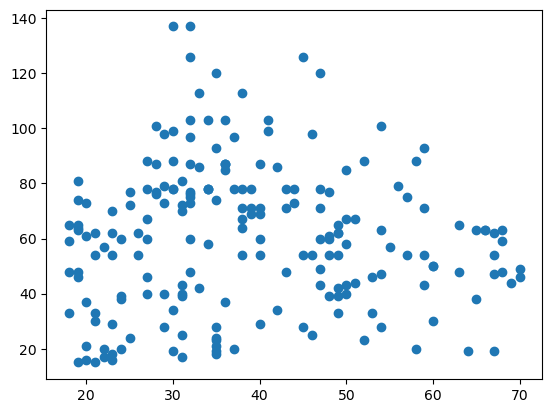

In [30]:
plt.scatter(df.age, df.income)

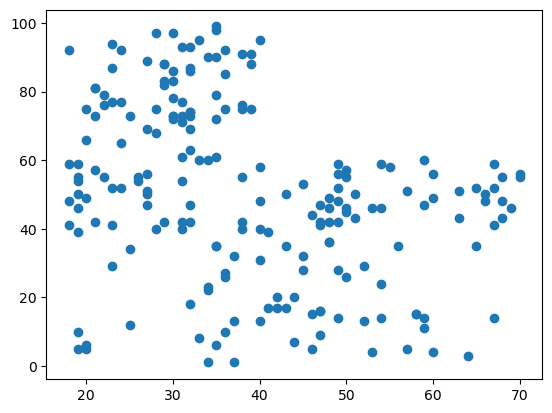

In [31]:
plt.scatter(df.age,df.score)

Text(0.5, 1.0, 'Score and Income plot')

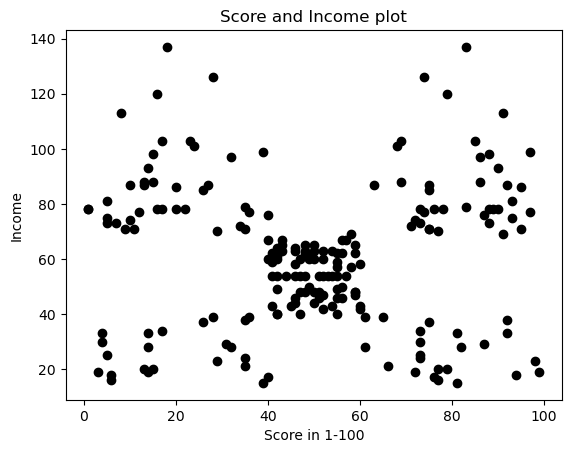

In [32]:
plt.scatter(df.score,df.income,color='black')
plt.xlabel('Score in 1-100')
plt.ylabel('Income')
plt.title('Score and Income plot')

# pairplot

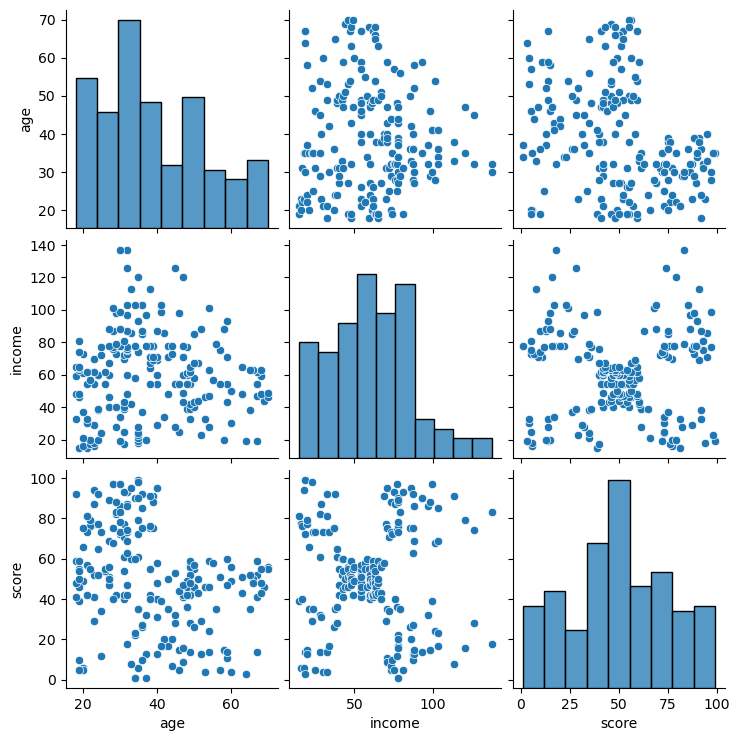

In [33]:
sns.pairplot(df[['age','income','score']])

# income and score

Text(0.5, 1.0, 'Score and Income plot')

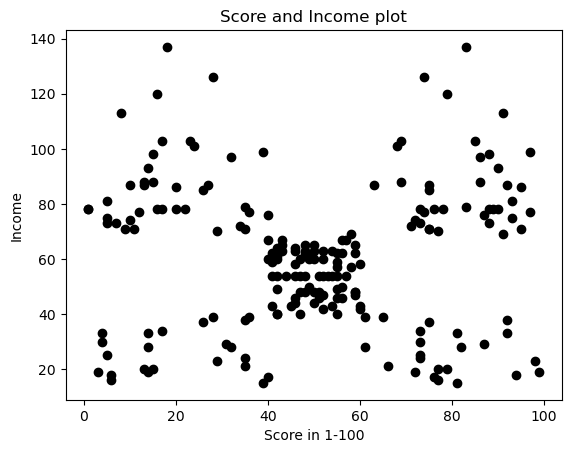

In [34]:
plt.scatter(df.score,df.income,color='black')
plt.xlabel('Score in 1-100')
plt.ylabel('Income')
plt.title('Score and Income plot')

# K-Mean Cluster

In [35]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans


In [36]:
km = KMeans(n_clusters=8) #create kmean object

In [37]:
km.fit(df[['score','income']]) #fit() --> training the ml model

C:\Users\Md Monjurul Islam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Md Monjurul Islam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans()

In [38]:
df['new_cluster'] = km.predict(df[['score','income']])

In [39]:
df.head()

,gender,age,income,score,new_cluster
0,Male,19,15,39,3
1,Male,21,15,81,5
2,Female,20,16,6,3
3,Female,23,16,77,5
4,Female,31,17,40,3


# viz

In [40]:
df6 = df[df.new_cluster == 6]

In [41]:
df6.head()

,gender,age,income,score,new_cluster
181,Female,32,97,86,6
183,Female,29,98,88,6
185,Male,30,99,97,6
187,Male,28,101,68,6
189,Female,36,103,85,6


In [42]:
df6.shape

(10, 5)

Text(0.5, 1.0, 'Score and Income plot')

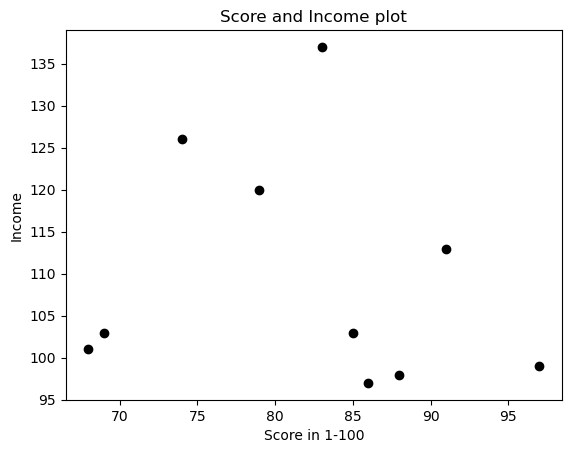

In [43]:
plt.scatter(df6.score,df6.income,color='black')
plt.xlabel('Score in 1-100')
plt.ylabel('Income')
plt.title('Score and Income plot')

<function matplotlib.pyplot.show(close=None, block=None)>

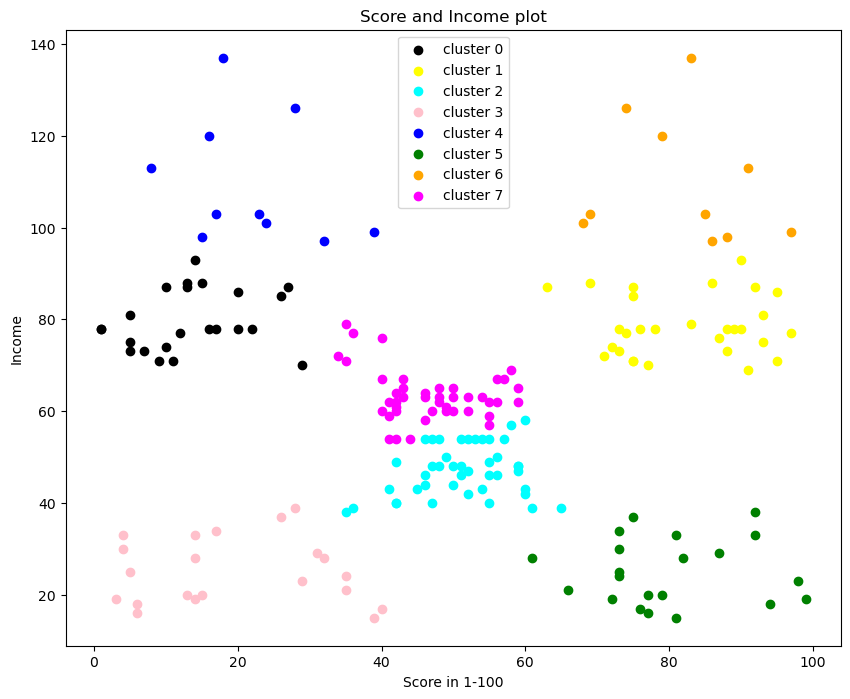

In [44]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]
df5 = df[df.new_cluster == 5]
df6 = df[df.new_cluster == 6]
df7 = df[df.new_cluster == 7]

plt.figure(figsize=(10,8))

plt.scatter(df0.score, df0.income, color='black', label="cluster 0")
plt.scatter(df1.score, df1.income, color='yellow', label="cluster 1")
plt.scatter(df2.score, df2.income, color='cyan', label="cluster 2")
plt.scatter(df3.score, df3.income, color='pink', label="cluster 3")
plt.scatter(df4.score, df4.income, color='blue', label="cluster 4")
plt.scatter(df5.score, df5.income, color='green', label="cluster 5")
plt.scatter(df6.score, df6.income, color='orange', label="cluster 6")
plt.scatter(df7.score, df7.income, color='magenta', label="cluster 7")

plt.xlabel('Score in 1-100')
plt.ylabel('Income')
plt.title('Score and Income plot')

plt.legend()
plt.show

In [45]:
center1 = km.cluster_centers_
center1

array([[ 13.39130435,  79.73913043],
       [ 82.17241379,  78.55172414],
       [ 51.3255814 ,  47.06976744],
       [ 19.52380952,  25.14285714],
       [ 22.        , 109.7       ],
       [ 80.04761905,  25.0952381 ],
       [ 82.        , 109.7       ],
       [ 46.76744186,  63.41860465]])

<function matplotlib.pyplot.show(close=None, block=None)>

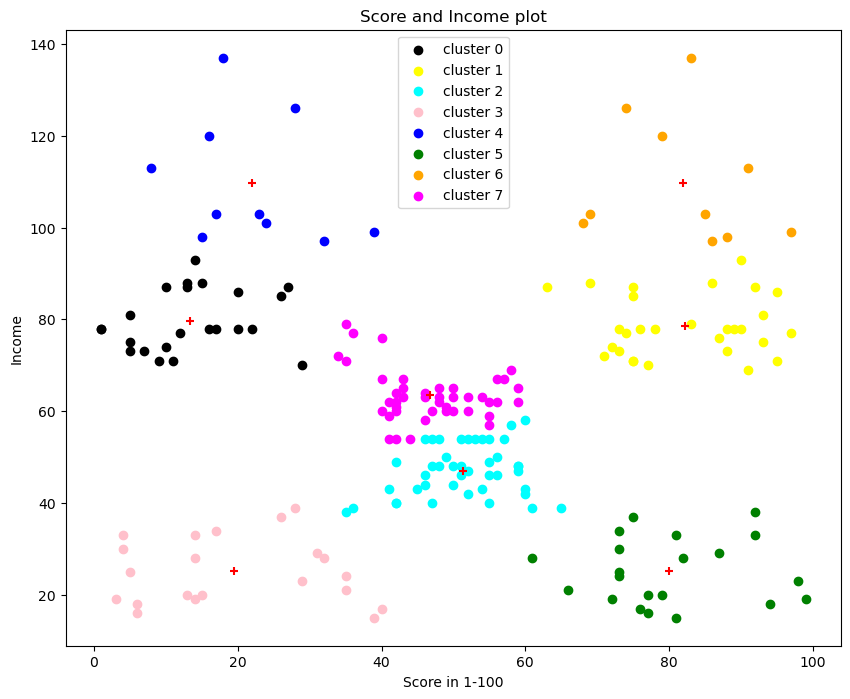

In [46]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]
df5 = df[df.new_cluster == 5]
df6 = df[df.new_cluster == 6]
df7 = df[df.new_cluster == 7]

plt.figure(figsize=(10,8))

plt.scatter(df0.score, df0.income, color='black', label="cluster 0")
plt.scatter(df1.score, df1.income, color='yellow', label="cluster 1")
plt.scatter(df2.score, df2.income, color='cyan', label="cluster 2")
plt.scatter(df3.score, df3.income, color='pink', label="cluster 3")
plt.scatter(df4.score, df4.income, color='blue', label="cluster 4")
plt.scatter(df5.score, df5.income, color='green', label="cluster 5")
plt.scatter(df6.score, df6.income, color='orange', label="cluster 6")
plt.scatter(df7.score, df7.income, color='magenta', label="cluster 7")

plt.scatter(center1[:,0], center1[:,1], color="red", marker="+")

plt.xlabel('Score in 1-100')
plt.ylabel('Income')
plt.title('Score and Income plot')

plt.legend()
plt.show

# Optimizing K-Means

In [47]:
wcss = []
clusters_range = range(1,15)

for k in clusters_range:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['score','income']])
    wcss.append(km2.inertia_) #inertia is the wcss value

C:\Users\Md Monjurul Islam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Md Monjurul Islam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Md Monjurul Islam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Md Monjurul Islam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

In [48]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37239.83554245604,
 30241.343617936593,
 25009.3117835985,
 21838.863692828912,
 20046.286918659367,
 17511.7418692661,
 15845.619372815672,
 14674.773045909085,
 12775.343451156685]

Text(0.5, 1.0, 'Optimizing value of the clusters')

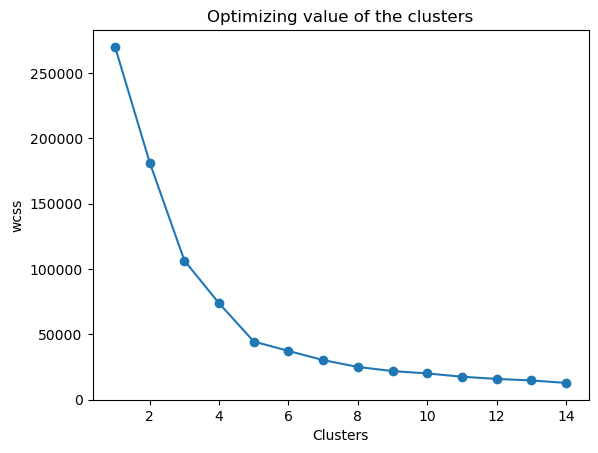

In [49]:
plt.plot(clusters_range, wcss, marker='o')
plt.xlabel('Clusters')
plt.ylabel('wcss')
plt.title('Optimizing value of the clusters')

#kneelocator

In [50]:
#!pip install kneed

In [51]:
#from kneed import KneedLocator
#kn = KneeLocator(clusters_range, wcss, curve='convex', direction="decreasing")

In [52]:
#kn

In [53]:
#kn.knee

# After Optimizing

In [54]:
#Optimal Value  5
km3 = KMeans(n_clusters=3) #create kmean object
km3.fit(df[['score','income']]) #fit() --> training the ml model

C:\Users\Md Monjurul Islam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Md Monjurul Islam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [55]:
df['optimize_cluster'] = km3.predict(df[['score','income']])
df.head()

,gender,age,income,score,new_cluster,optimize_cluster
0,Male,19,15,39,3,1
1,Male,21,15,81,5,1
2,Female,20,16,6,3,1
3,Female,23,16,77,5,1
4,Female,31,17,40,3,1


In [56]:
center2 = km3.cluster_centers_

<function matplotlib.pyplot.show(close=None, block=None)>

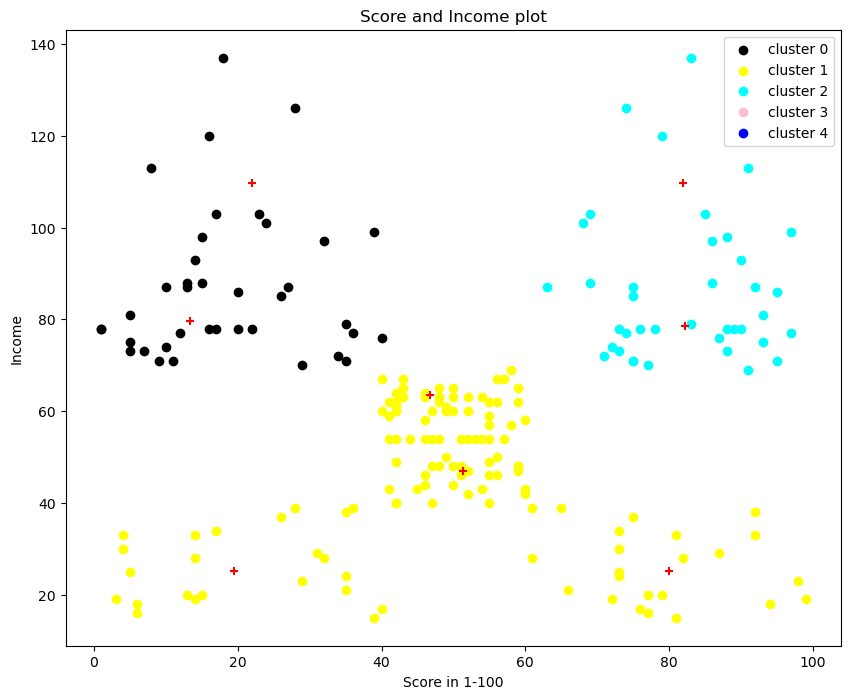

In [57]:
df0 = df[df.optimize_cluster == 0]
df1 = df[df.optimize_cluster == 1]
df2 = df[df.optimize_cluster == 2]
df3 = df[df.optimize_cluster == 3]
df4 = df[df.optimize_cluster == 4]


plt.figure(figsize=(10,8))

plt.scatter(df0.score, df0.income, color='black', label="cluster 0")
plt.scatter(df1.score, df1.income, color='yellow', label="cluster 1")
plt.scatter(df2.score, df2.income, color='cyan', label="cluster 2")
plt.scatter(df3.score, df3.income, color='pink', label="cluster 3")
plt.scatter(df4.score, df4.income, color='blue', label="cluster 4")


plt.scatter(center1[:,0], center1[:,1], color="red", marker="+")

plt.xlabel('Score in 1-100')
plt.ylabel('Income')
plt.title('Score and Income plot')

plt.legend()
plt.show